In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import os
import pandas as pd
import glob

# Path to NASDAQ CSV folder
csv_dir = "/kaggle/input/stock-market-data/stock_market_data/nasdaq/csv"

# Get all CSV file paths
csv_files = glob.glob(os.path.join(csv_dir, "*.csv"))

# Load and merge all NASDAQ stock data
nasdaq_data = []

for file in csv_files:
    try:
        df = pd.read_csv(file, on_bad_lines='skip')  # skip problematic lines
        df['Symbol'] = os.path.basename(file).replace('.csv', '')  # Add stock name
        nasdaq_data.append(df)
    except Exception as e:
        print(f"❌ Error reading {file}: {e}")

# Combine into one DataFrame
nasdaq_df = pd.concat(nasdaq_data, ignore_index=True)
nasdaq_df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close,Symbol
0,03-03-2000,492.0000,492.0,1071533.0,876.0,817.5,817.5,UTSI
1,06-03-2000,730.3125,744.0,173592.0,876.0,811.5,811.5,UTSI
2,07-03-2000,750.0000,798.0,95700.0,807.0,768.0,768.0,UTSI
3,08-03-2000,684.0000,756.0,158142.0,763.5,723.0,723.0,UTSI
4,09-03-2000,675.0000,706.5,82425.0,733.5,733.5,733.5,UTSI


In [4]:
unique_stocks = nasdaq_df['Symbol'].nunique()
print(f"Total unique NASDAQ stocks loaded: {unique_stocks}")

Total unique NASDAQ stocks loaded: 1564


**AAPL Stock Price Prediction (ML)**

In [5]:
aapl_df = nasdaq_df[nasdaq_df['Symbol'] == 'AAPL'].copy()

# Fix date parsing using dayfirst
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'], dayfirst=True)

# Sort by date
aapl_df = aapl_df.sort_values('Date').reset_index(drop=True)
aapl_df.head()


,Date,Low,Open,Volume,High,Close,Adjusted Close,Symbol
0,1980-12-12,0.128348,0.128348,469033600.0,0.128906,0.128348,0.099874,AAPL
1,1980-12-15,0.121652,0.122210,175884800.0,0.122210,0.121652,0.094663,AAPL
2,1980-12-16,0.112723,0.113281,105728000.0,0.113281,0.112723,0.087715,AAPL
3,1980-12-17,0.115513,0.115513,86441600.0,0.116071,0.115513,0.089886,AAPL
4,1980-12-18,0.118862,0.118862,73449600.0,0.119420,0.118862,0.092492,AAPL


In [6]:
aapl_df = nasdaq_df[nasdaq_df['Symbol'] == 'AAPL'].copy()

# Coerce bad dates → NaT
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'], errors='coerce', dayfirst=True)

# Drop rows with NaT in Date
aapl_df = aapl_df.dropna(subset=['Date'])
aapl_df = aapl_df.sort_values('Date').reset_index(drop=True)
aapl_df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close,Symbol
0,1980-12-12,0.128348,0.128348,469033600.0,0.128906,0.128348,0.099874,AAPL
1,1980-12-15,0.121652,0.122210,175884800.0,0.122210,0.121652,0.094663,AAPL
2,1980-12-16,0.112723,0.113281,105728000.0,0.113281,0.112723,0.087715,AAPL
3,1980-12-17,0.115513,0.115513,86441600.0,0.116071,0.115513,0.089886,AAPL
4,1980-12-18,0.118862,0.118862,73449600.0,0.119420,0.118862,0.092492,AAPL


In [7]:
aapl_df['Prev_Close'] = aapl_df['Close'].shift(1)
aapl_df['Prev_Open'] = aapl_df['Open'].shift(1)
aapl_df['Prev_High'] = aapl_df['High'].shift(1)
aapl_df['Prev_Low'] = aapl_df['Low'].shift(1)
aapl_df['Prev_Volume'] = aapl_df['Volume'].shift(1)

# Drop rows with NaNs after shifting
aapl_df.dropna(inplace=True)

In [8]:
features = ['Prev_Close', 'Prev_Open', 'Prev_High', 'Prev_Low', 'Prev_Volume']
X = aapl_df[features]
y = aapl_df['Close']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R² Score: 0.9987596591987479
RMSE: 1.714521637866576


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


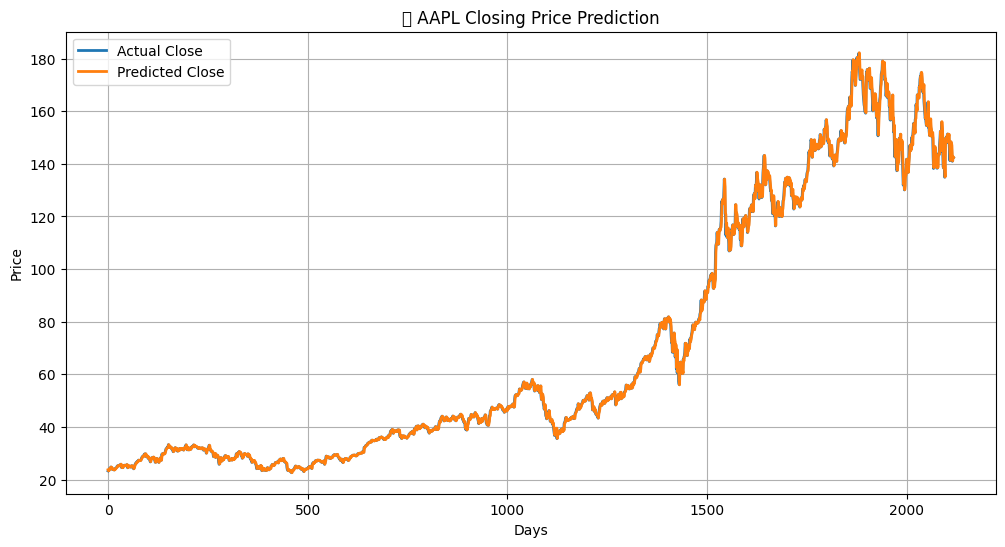

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close', linewidth=2)
plt.plot(y_pred, label='Predicted Close', linewidth=2)
plt.title("📈 AAPL Closing Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


MULTIPLE MODELS AND COMPARISON

In [13]:
features = ['Prev_Close', 'Prev_Open', 'Prev_High', 'Prev_Low', 'Prev_Volume']
X = aapl_df[features]
y = aapl_df['Close']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "SVR (RBF Kernel)": SVR(kernel='rbf')
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results.append((name, r2, rmse))
    print(f"{name} — R²: {r2:.4f}, RMSE: {rmse:.4f}")


Linear Regression — R²: 0.9988, RMSE: 1.7145
Random Forest — R²: -0.8616, RMSE: 66.4227
XGBoost — R²: -0.8719, RMSE: 66.6063
KNN Regressor — R²: -2.0366, RMSE: 84.8332
SVR (RBF Kernel) — R²: -2.0558, RMSE: 85.1006


In [15]:
import pandas as pd

results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "RMSE"]).sort_values(by="R2 Score", ascending=False)
results_df

,Model,R2 Score,RMSE
0,Linear Regression,0.998760,1.714522
1,Random Forest,-0.861610,66.422744
2,XGBoost,-0.871914,66.606323
3,KNN Regressor,-2.036596,84.833224
4,SVR (RBF Kernel),-2.055769,85.100616


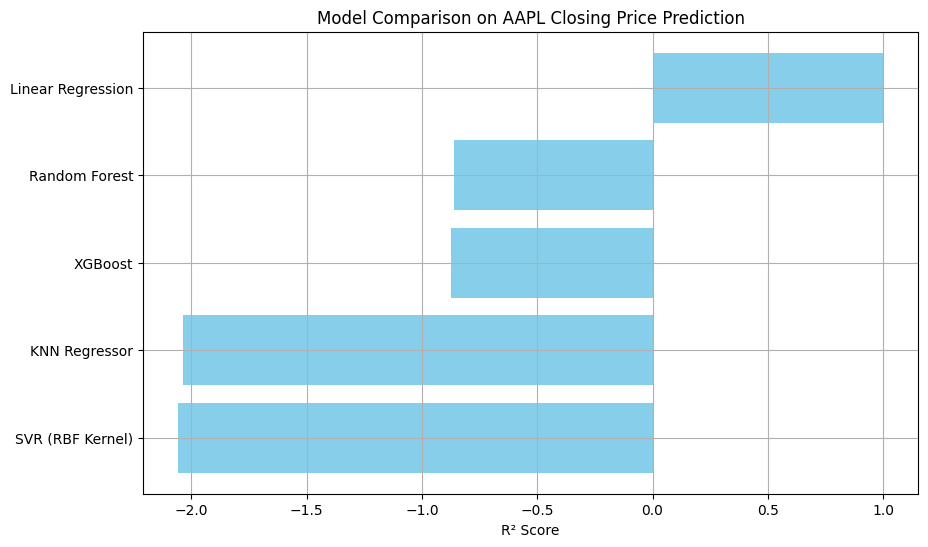

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(results_df['Model'], results_df['R2 Score'], color='skyblue')
plt.xlabel("R² Score")
plt.title("Model Comparison on AAPL Closing Price Prediction")
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()


MULTIPLE STOCKS AT ONCE

In [17]:
import pandas as pd
from tqdm import tqdm

all_stock_dfs = []

symbols = nasdaq_df['Symbol'].unique()

for symbol in tqdm(symbols[:100]):  # limit to 100 for speed (or use full 1564)
    df = nasdaq_df[nasdaq_df['Symbol'] == symbol].copy()
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df.dropna(subset=['Date'], inplace=True)
    df.sort_values('Date', inplace=True)
    
    # Create lag features
    df['Prev_Close'] = df['Close'].shift(1)
    df['Prev_Open'] = df['Open'].shift(1)
    df['Prev_High'] = df['High'].shift(1)
    df['Prev_Low'] = df['Low'].shift(1)
    df['Prev_Volume'] = df['Volume'].shift(1)
    
    df.dropna(inplace=True)
    all_stock_dfs.append(df)

# Combine all stocks
multi_df = pd.concat(all_stock_dfs, ignore_index=True)


100%|██████████| 100/100 [00:58<00:00,  1.71it/s]


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
multi_df['Symbol_Code'] = le.fit_transform(multi_df['Symbol'])


In [19]:
features = ['Prev_Close', 'Prev_Open', 'Prev_High', 'Prev_Low', 'Prev_Volume', 'Symbol_Code']
X = multi_df[features]
y = multi_df['Close']


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=False, test_size=0.2
)

In [21]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: 0.6261200355419143
RMSE: 28.623752582190228


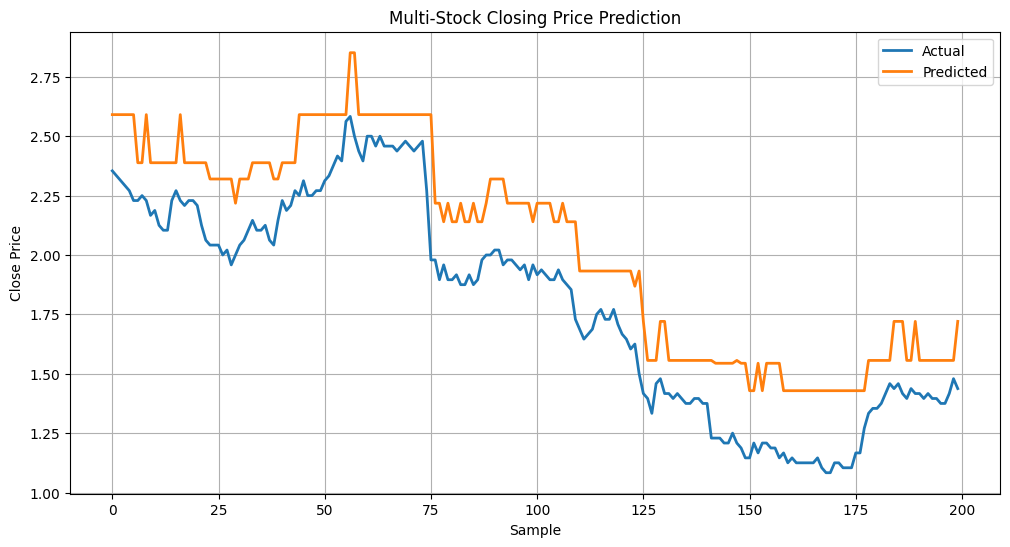

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:200], label='Actual', linewidth=2)
plt.plot(y_pred[:200], label='Predicted', linewidth=2)
plt.title("Multi-Stock Closing Price Prediction")
plt.xlabel("Sample")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Feature & Target
features = ['Prev_Close', 'Prev_Open', 'Prev_High', 'Prev_Low', 'Prev_Volume', 'Symbol_Code']
X = multi_df[features]
y = multi_df['Close']

# ✅ Scale data (important for SVR & KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, shuffle=False, test_size=0.2)

# ✅ Models dictionary
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
}

# ✅ Train & Evaluate
results = []
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results.append((name, r2, rmse))
    predictions[name] = y_pred
    print(f"{name} — R²: {r2:.4f}, RMSE: {rmse:.4f}")


Linear Regression — R²: 0.9985, RMSE: 1.7829
KNN Regressor — R²: 0.4419, RMSE: 34.9732
Random Forest — R²: 0.9612, RMSE: 9.2243
XGBoost — R²: 0.6261, RMSE: 28.6238


,Model,R2 Score,RMSE
0,Linear Regression,0.998549,1.782940
2,Random Forest,0.961172,9.224323
3,XGBoost,0.626120,28.623753
1,KNN Regressor,0.441851,34.973208


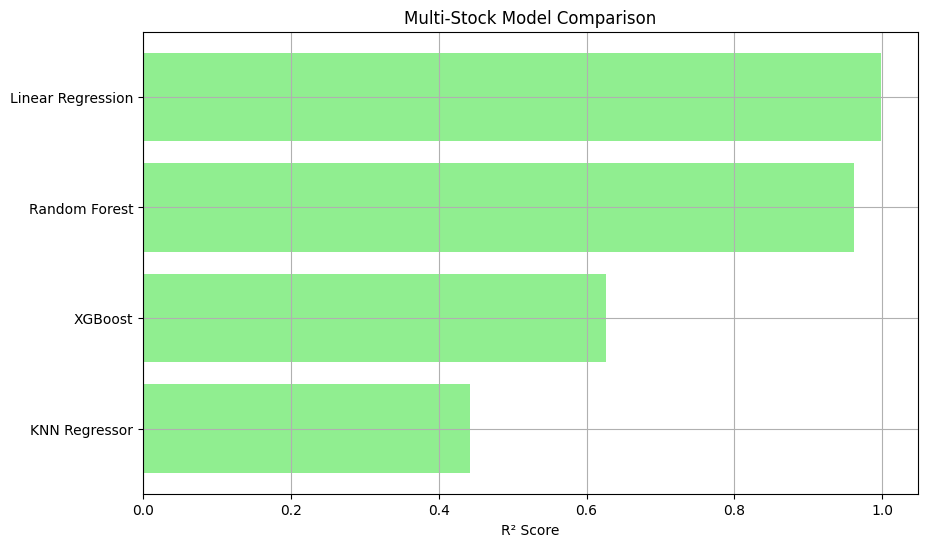

In [25]:
# Tabulate results
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "RMSE"]).sort_values(by="R2 Score", ascending=False)
display(results_df)

# Plot
plt.figure(figsize=(10,6))
plt.barh(results_df['Model'], results_df['R2 Score'], color='lightgreen')
plt.xlabel("R² Score")
plt.title("Multi-Stock Model Comparison")
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

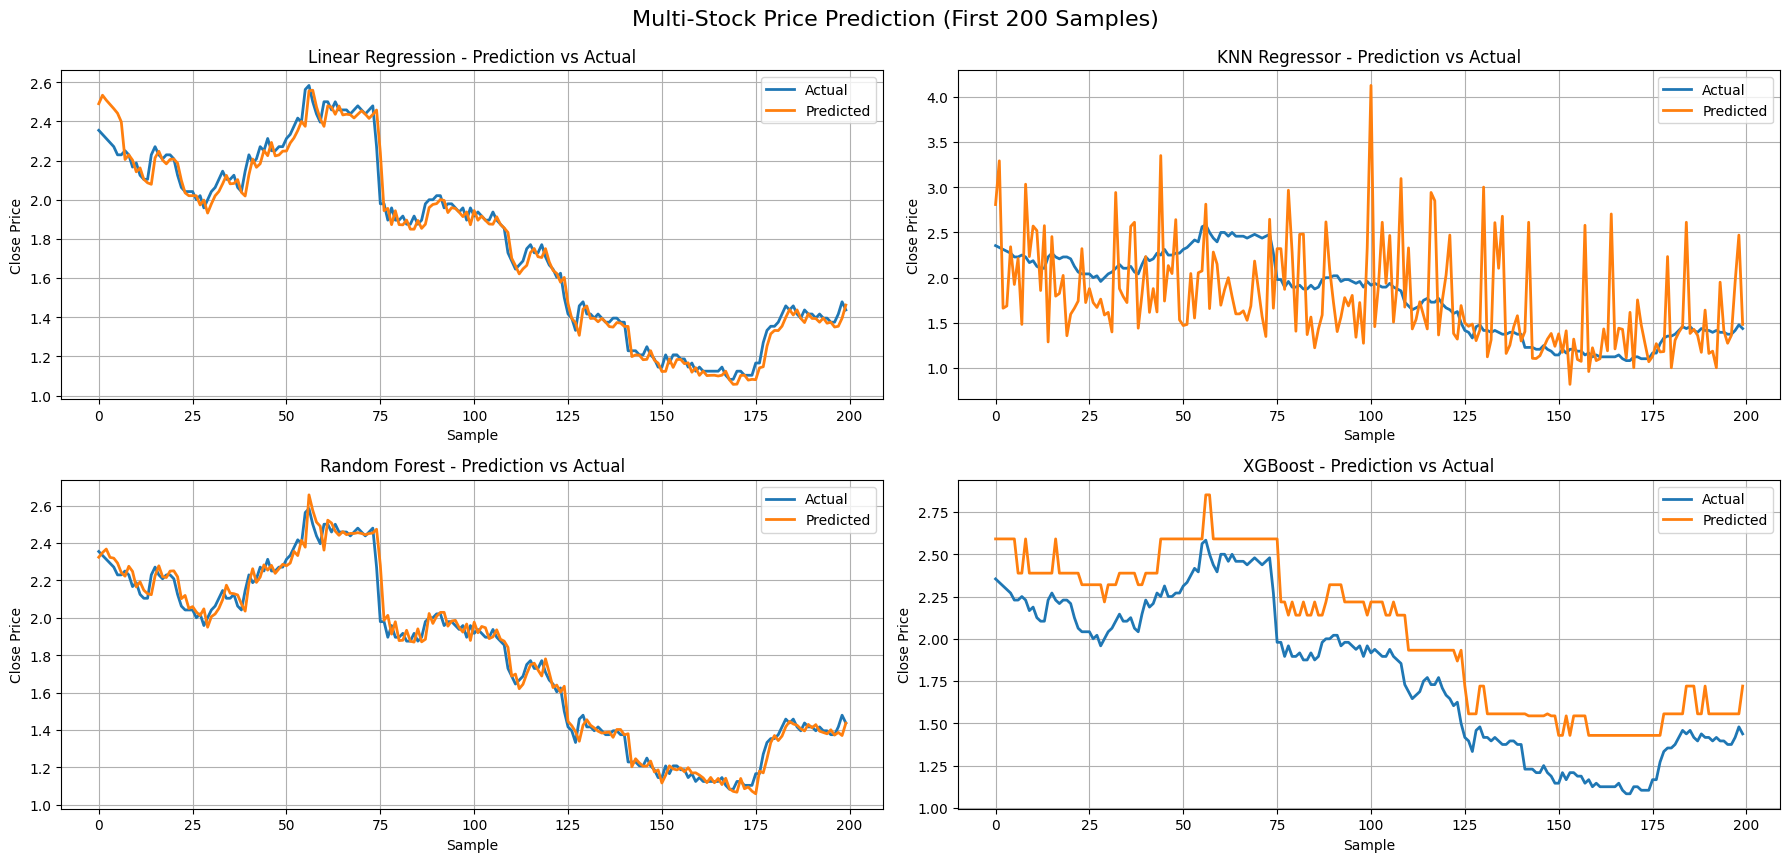

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
models_to_plot = list(predictions.keys())

for i, model_name in enumerate(models_to_plot, 1):
    plt.subplot(3, 2, i)
    plt.plot(y_test.values[:200], label='Actual', linewidth=2)
    plt.plot(predictions[model_name][:200], label='Predicted', linewidth=2)
    plt.title(f"{model_name} - Prediction vs Actual")
    plt.xlabel("Sample")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Multi-Stock Price Prediction (First 200 Samples)", fontsize=16, y=1.02)
plt.show()


In [35]:
print(y_test.shape)


(105471,)


In [37]:
import joblib  # Recommended for models with large numpy arrays (like trees)
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
}

['random_forest_model.pkl']

In [38]:

# Save Linear Regression
joblib.dump(models["Linear Regression"], "linear_regression_model.pkl")



['linear_regression_model.pkl']

In [39]:
# Save Random Forest
joblib.dump(models["Random Forest"], "random_forest_model.pkl")


['random_forest_model.pkl']

In [40]:
!ls -lh *.pkl

-rw-r--r-- 1 root root 146 Jul  6 09:06 linear_regression_model.pkl
-rw-r--r-- 1 root root 667 Jul  6 09:06 random_forest_model.pkl


In [42]:
# Load saved models later
lr_model = joblib.load("linear_regression_model.pkl")
rf_model = joblib.load("random_forest_model.pkl")